##Introduction to to Convolutional NN Assignment

# Mount Google Drive using Google Colab


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

### Problem Statement:
The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image

In [ ]:
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

### # Step 1: Data Preparation

In [ ]:
# Extract the dataset if it's still in a zip file
zip_file = '/content/drive/My Drive/Colab Notebooks/intellipaat assignment/DL/cats_dogs.zip'
extracted_dir = '/content/drive/My Drive/Colab Notebooks/intellipaat assignment/DL/cats_dogs/'

In [ ]:
if not os.path.exists(extracted_dir):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

# Paths for extracted datasets
cats_dir = os.path.join(extracted_dir, 'cats')
dogs_dir = os.path.join(extracted_dir, 'dogs')


In [ ]:
# Create directories for train and test sets
train_dir = os.path.join(extracted_dir, 'train_split')
test_dir = os.path.join(extracted_dir, 'test_split')

for category in ['cats', 'dogs']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Get all image file paths
cat_files = [os.path.join(cats_dir, f) for f in os.listdir(cats_dir) if os.path.isfile(os.path.join(cats_dir, f))]
dog_files = [os.path.join(dogs_dir, f) for f in os.listdir(dogs_dir) if os.path.isfile(os.path.join(dogs_dir, f))]


In [ ]:
# Split data into training and testing sets (80-20 split)
train_cats, test_cats = train_test_split(cat_files, test_size=0.2, random_state=42)
train_dogs, test_dogs = train_test_split(dog_files, test_size=0.2, random_state=42)

# Function to move files
def move_files(files, dest_dir):
    for file in files:
        shutil.move(file, os.path.join(dest_dir, os.path.basename(file)))

# Move files to train and test directories
move_files(train_cats, os.path.join(train_dir, 'cats'))
move_files(test_cats, os.path.join(test_dir, 'cats'))
move_files(train_dogs, os.path.join(train_dir, 'dogs'))
move_files(test_dogs, os.path.join(test_dir, 'dogs'))

### # Step 2: Data Augmentation and Preprocessing


In [ ]:

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    #,validation_split=0.2  # Using 20% of training data for validation
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'#,
    #subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'#,
    #subset='validation'  # Set as validation data
)


Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:

# Step 3: Model Building

# Construct the CNN with increased complexity
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])





In [ ]:
# Step 4: Training
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/50
50/50 [==============================] - 33s 470ms/step - loss: 0.6918 - accuracy: 0.5131 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
50/50 [==============================] - 22s 441ms/step - loss: 0.6922 - accuracy: 0.5169 - val_loss: 0.6895 - val_accuracy: 0.4994 - lr: 1.0000e-04
Epoch 3/50
50/50 [==============================] - 24s 475ms/step - loss: 0.6882 - accuracy: 0.5362 - val_loss: 0.6837 - val_accuracy: 0.5487 - lr: 1.0000e-04
Epoch 4/50
50/50 [==============================] - 23s 473ms/step - loss: 0.6854 - accuracy: 0.5569 - val_loss: 0.6793 - val_accuracy: 0.5856 - lr: 1.0000e-04
Epoch 5/50
50/50 [==============================] - 23s 461ms/step - loss: 0.6817 - accuracy: 0.5556 - val_loss: 0.6692 - val_accuracy: 0.5900 - lr: 1.0000e-04
Epoch 6/50
50/50 [==============================] - 23s 472ms/step - loss: 0.6759 - accuracy: 0.5888 - val_loss: 0.6671 - val_accuracy: 0.5869 - lr: 1.0000e-04
Epoch 7/50
50/50 [======================

In [ ]:
# Step 5: Evaluation

# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc:.4f}')


50/50 [==============================] - 12s 237ms/step - loss: 0.4523 - accuracy: 0.7869
Validation accuracy: 0.7869


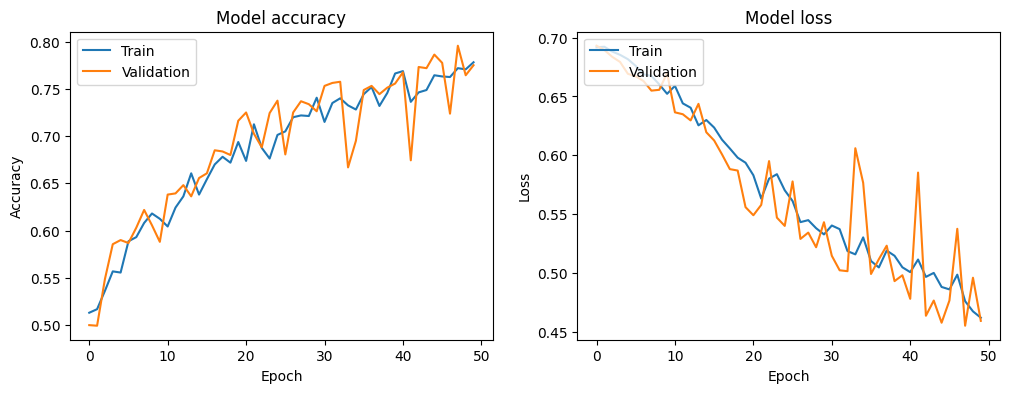

In [ ]:
import matplotlib.pyplot as plt # Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### Validation accuracy: 0.7869

### Trying with pretrained model

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# Load the VGG16 model, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
50/50 [==============================] - 31s 514ms/step - loss: 0.7034 - accuracy: 0.5275 - val_loss: 0.6257 - val_accuracy: 0.7287 - lr: 1.0000e-04
Epoch 2/50
50/50 [==============================] - 26s 519ms/step - loss: 0.6345 - accuracy: 0.6406 - val_loss: 0.5851 - val_accuracy: 0.7356 - lr: 1.0000e-04
Epoch 3/50
50/50 [==============================] - 26s 515ms/step - loss: 0.5827 - accuracy: 0.6931 - val_loss: 0.5439 - val_accuracy: 0.7675 - lr: 1.0000e-04
Epoch 4/50
50/50 [==============================] - 26s 533ms/step - loss: 0.5596 - accuracy: 0.7250 - val_loss: 0.5137 - val_accuracy: 0.7912 - lr: 1.0000e-04
Epoch 5/50
50/50 [==============================] - 24s 480ms/step - loss: 0.5360 - accuracy: 0.7350 - val_loss: 0.4930 - val_accuracy: 0.7925 - lr: 1.0000e-04
Epoch 6/50
50/50 [==============================] - 25s 506ms/step - loss: 0.5014 - accuracy: 0.7581 - val_loss: 0.4779 - val_accuracy: 0.8006 - lr: 1.0000e-04
Epoch 7/50
50/50 [======================

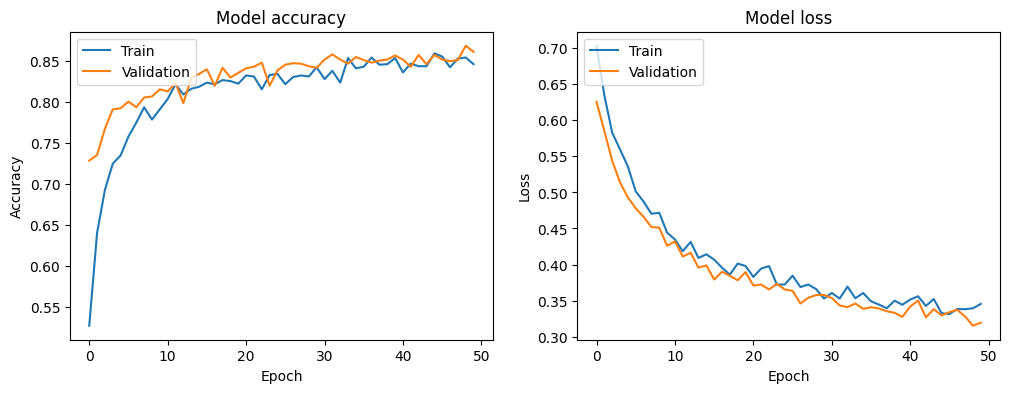

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Step 6: Prediction
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction < 0.5:
        print("The image is a cat")
    else:
        print("The image is a dog")



In [ ]:
# Example prediction
folder_path = '/content/drive/MyDrive/Colab Notebooks/intellipaat assignment/DL/test_'

# Get all files in the folder
image_files = os.listdir(folder_path)
image_files[0]


'1.jpeg'

Predicting image: 1.jpeg


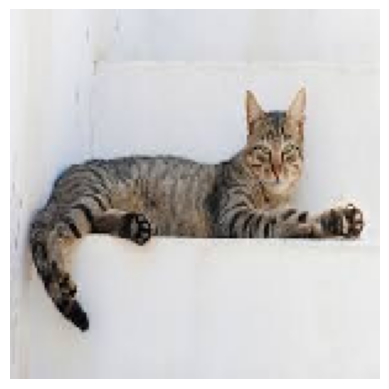

1/1 [==============================] - 0s 18ms/step
The image is a cat
Predicting image: 2.jpeg


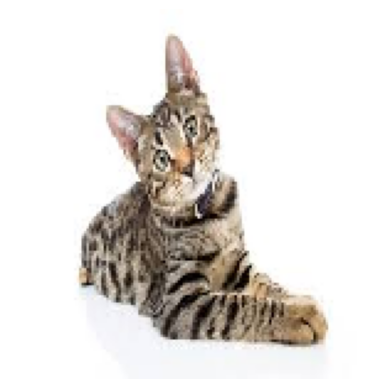

1/1 [==============================] - 0s 23ms/step
The image is a cat
Predicting image: 3.jpeg


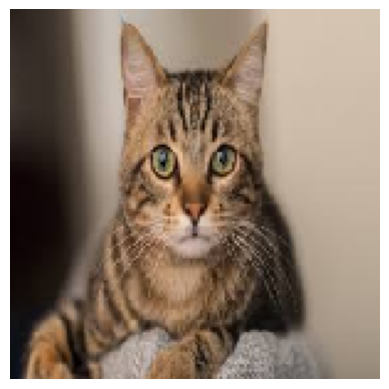

1/1 [==============================] - 0s 18ms/step
The image is a cat
Predicting image: 4.jpeg


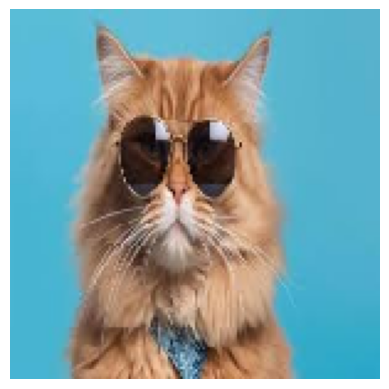

1/1 [==============================] - 0s 17ms/step
The image is a cat
Predicting image: 5.jpeg


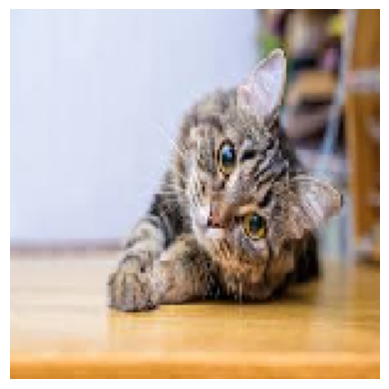

1/1 [==============================] - 0s 18ms/step
The image is a cat
Predicting image: 6.jpeg


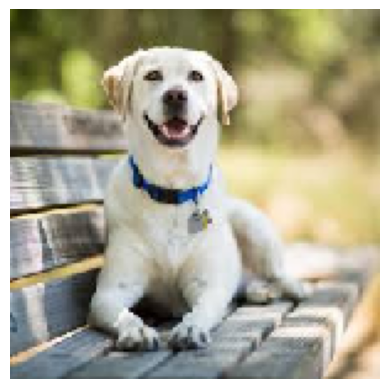

1/1 [==============================] - 0s 18ms/step
The image is a dog
Predicting image: 7.jpeg


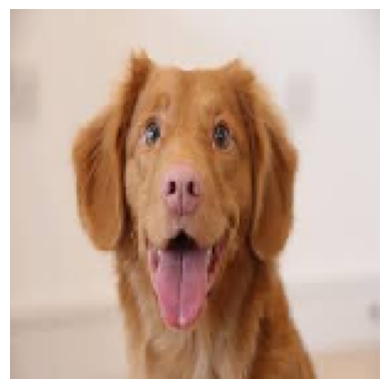

1/1 [==============================] - 0s 18ms/step
The image is a dog
Predicting image: 8.jpeg


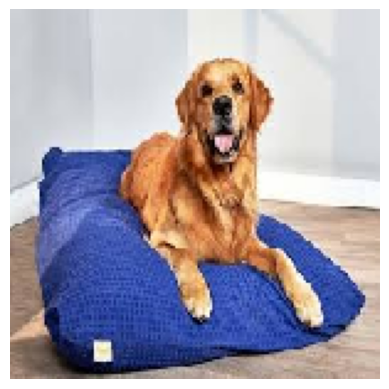

1/1 [==============================] - 0s 17ms/step
The image is a dog
Predicting image: 9.jpeg


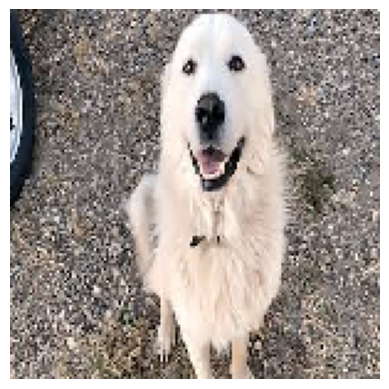

1/1 [==============================] - 0s 20ms/step
The image is a dog
Predicting image: 10.jpeg


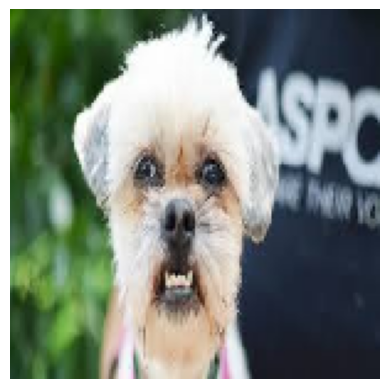

1/1 [==============================] - 0s 19ms/step
The image is a dog


In [ ]:
# Call predict_images for each image file
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file) # Construct the full image path
    print(f"Predicting image: {image_file}")
    predict_image(image_path) # Pass the full image path to the function